In [ ]:
pip install pandas


In [ ]:
pip install matplotlib

In [13]:
pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 83.8 MB/s eta 0:00:00
     ---------------------------------------- 233.8/233.8 kB ? eta 0:00:00
     --------------------------------------- 40.1/40.1 MB 73.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import warnings

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter('ignore', ConvergenceWarning)
%config InlineBackend.figure_format = 'retina'

#Import data
df = pd.read_csv('https://raw.githubusercontent.com/sattawat61/oil-price/main/dataset/DCOILBRENTEU.csv', parse_dates = ['DATE'])
df = df.set_index('DATE')
df = df.rename(columns = {'DCOILBRENTEU':'price'})

Text(0.5, 1.0, 'Daily oil price')

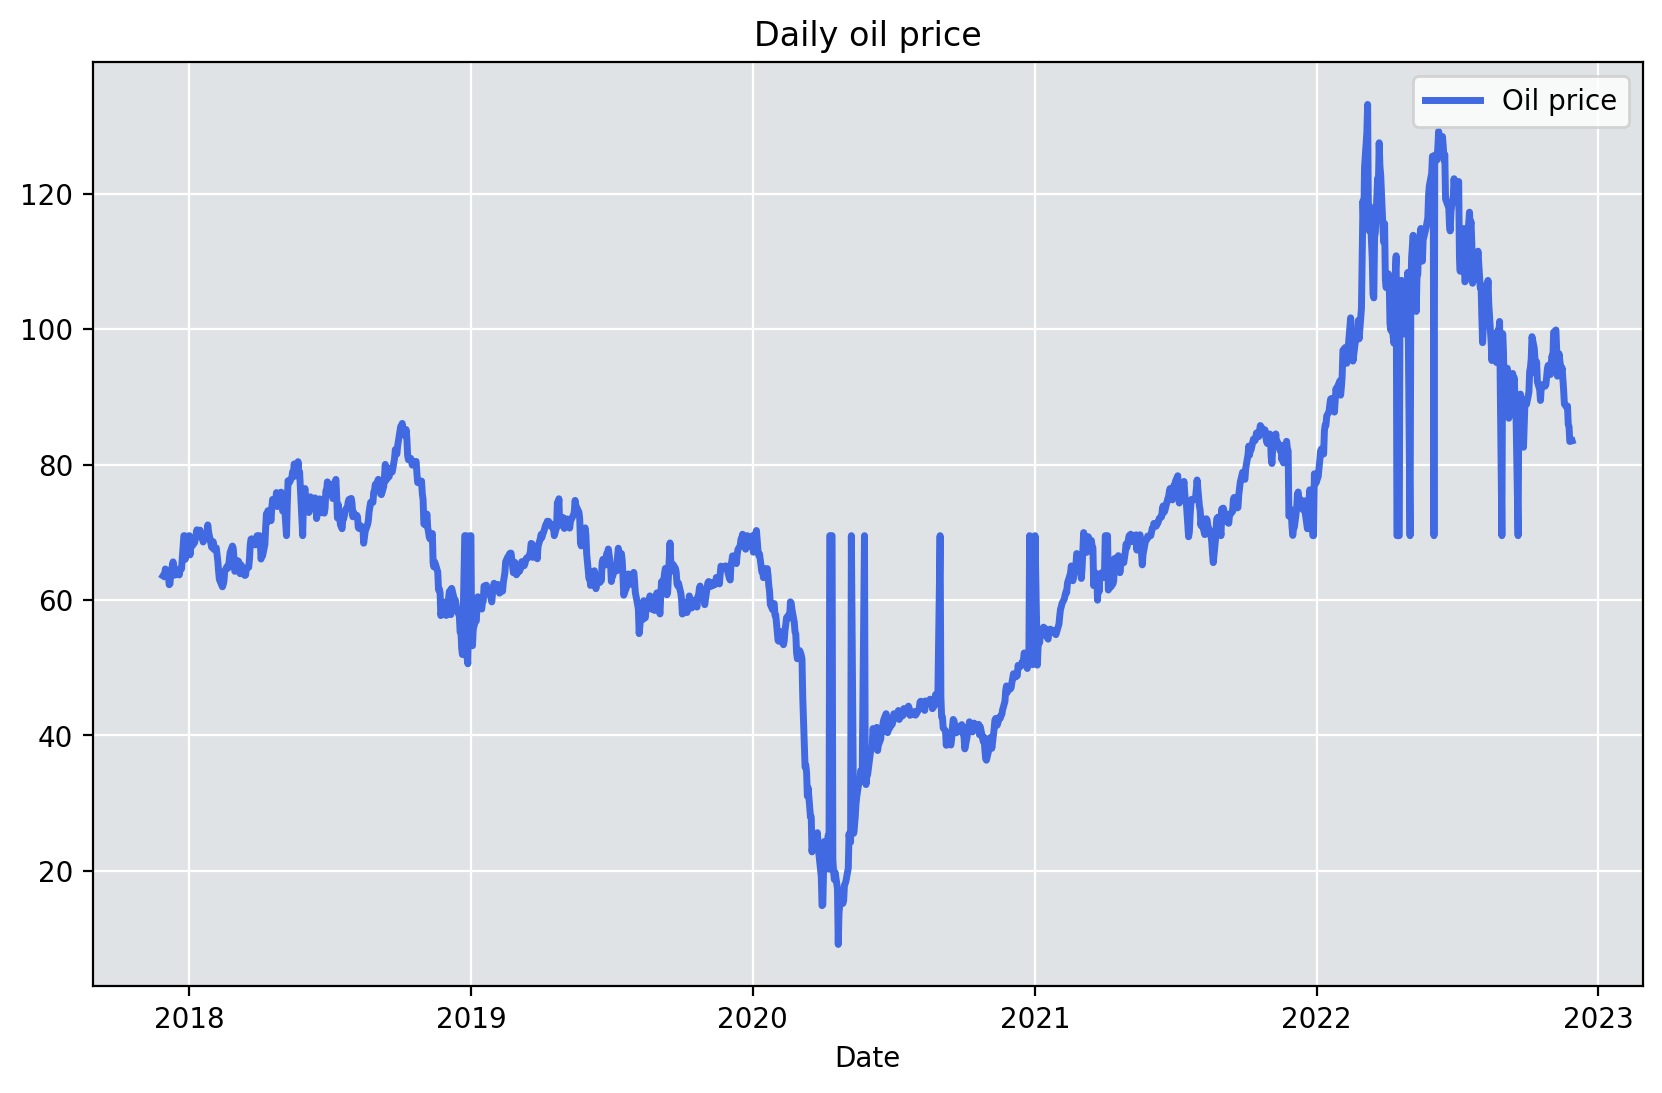

In [15]:
#Data assessment
df['price'] = df['price'].replace('.', np.nan)
df['price'] = df['price'].astype(np.float64)
df['price'] = df['price'].fillna(df['price'].mean())

#Plotting price
plt.figure(figsize = (10,6))
ax = plt.axes()
ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.plot(df['price'], c = 'royalblue', linewidth = 2.5, label = 'Oil price')
plt.xlabel('Date')
plt.legend()
plt.title('Daily oil price')

In [16]:
#Grid search parameters
p = d = q = range(0, 3) #pdq can be either 0 or 1 or 2
P = D = Q = range(0, 3) #PDQ can be either 0 or 1 or 2
seasonal = 7 #Define seasonal parameter (weekly)

#All possible combiantions
pdq = list(itertools.product(p, d, q))
PDQ = list(itertools.product(P, D, Q))
PDQS = [(a[0], a[1], a[2], seasonal) for a in PDQ] #With seasonal effect

In [17]:
#Grid search model
aic = None

for trends in pdq:
  for seasons in PDQS:
    model = SARIMAX(df['price'], order = trends, seasonal_order = seasons,
                    enforce_stationarity = False, enforce_invertibility = False, freq = 'B')
    model = model.fit()
    if aic is None:
      aic = model.aic
    elif aic > model.aic:
      aic = model.aic
      best_pdq = trends
      best_PDQS = seasons
      print(f'Lowest AIC: {aic}')
      print(f'Best p, d, q: {trends}')
      print(f'Best P, D, Q, S: {seasons}')
    else:
      continue

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Lowest AIC: 13271.551208205747
Best p, d, q: (0, 0, 0)
Best P, D, Q, S: (0, 0, 1, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Lowest AIC: 12090.146504175593
Best p, d, q: (0, 0, 0)
Best P, D, Q, S: (0, 0, 2, 7)
Lowest AIC: 8808.22923696196
Best p, d, q: (0, 0, 0)
Best P, D, Q, S: (0, 1, 0, 7)
Lowest AIC: 8655.241523195982
Best p, d, q: (0, 0, 0)
Best P, D, Q, S: (0, 1, 1, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Lowest AIC: 8608.477801109668
Best p, d, q: (0, 0, 0)
Best P, D, Q, S: (0, 1, 2, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Lowest AIC: 8606.140228443368
Best p, d, q: (0, 0, 0)
Best P, D, Q, S: (0, 2, 2, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-p

Lowest AIC: 8601.196208251957
Best p, d, q: (0, 0, 0)
Best P, D, Q, S: (1, 2, 2, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-p

Lowest AIC: 8521.521500183553
Best p, d, q: (0, 0, 1)
Best P, D, Q, S: (0, 1, 0, 7)
Lowest AIC: 8266.170695040246
Best p, d, q: (0, 0, 1)
Best P, D, Q, S: (0, 1, 1, 7)
Lowest AIC: 8228.491993325055
Best p, d, q: (0, 0, 1)
Best P, D, Q, S: (0, 1, 2, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Lowest AIC: 8223.390315488481
Best p, d, q: (0, 0, 1)
Best P, D, Q, S: (0, 2, 2, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-p

Lowest AIC: 8169.439703604158
Best p, d, q: (0, 0, 2)
Best P, D, Q, S: (0, 1, 1, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Lowest AIC: 8131.631141021337
Best p, d, q: (0, 0, 2)
Best P, D, Q, S: (0, 1, 2, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Lowest AIC: 8129.098620389976
Best p, d, q: (0, 0, 2)
Best P, D, Q, S: (0, 2, 2, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-p

Lowest AIC: 8122.581967430091
Best p, d, q: (0, 0, 2)
Best P, D, Q, S: (1, 1, 2, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-p

Lowest AIC: 8121.78030011462
Best p, d, q: (0, 0, 2)
Best P, D, Q, S: (2, 1, 2, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-p

Lowest AIC: 7964.067896941673
Best p, d, q: (0, 1, 0)
Best P, D, Q, S: (0, 0, 0, 7)
Lowest AIC: 7929.461388602467
Best p, d, q: (0, 1, 0)
Best P, D, Q, S: (0, 0, 1, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Lowest AIC: 7895.123707427545
Best p, d, q: (0, 1, 0)
Best P, D, Q, S: (0, 0, 2, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Lowest AIC: 7883.291598688433
Best p, d, q: (0, 1, 0)
Best P, D, Q, S: (0, 1, 2, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-p

Lowest AIC: 7878.252936729441
Best p, d, q: (0, 1, 0)
Best P, D, Q, S: (1, 1, 2, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-p

Lowest AIC: 7716.200096667651
Best p, d, q: (0, 1, 1)
Best P, D, Q, S: (0, 0, 0, 7)
Lowest AIC: 7681.327505084695
Best p, d, q: (0, 1, 1)
Best P, D, Q, S: (0, 0, 1, 7)
Lowest AIC: 7648.6087039206595
Best p, d, q: (0, 1, 1)
Best P, D, Q, S: (0, 0, 2, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Lowest AIC: 7639.132795758437
Best p, d, q: (0, 1, 1)
Best P, D, Q, S: (0, 1, 2, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-p

Lowest AIC: 7635.661451879174
Best p, d, q: (0, 1, 1)
Best P, D, Q, S: (1, 1, 2, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-p

Lowest AIC: 7606.75625060566
Best p, d, q: (0, 1, 2)
Best P, D, Q, S: (0, 0, 2, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Lowest AIC: 7597.061445668909
Best p, d, q: (0, 1, 2)
Best P, D, Q, S: (0, 1, 2, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-p

Lowest AIC: 7593.640426193182
Best p, d, q: (0, 1, 2)
Best P, D, Q, S: (1, 1, 2, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-p

In [25]:
#Fitting model
model = SARIMAX(df['price'], order = best_pdq, seasonal_order = best_PDQS,
                enforce_stationarity = False, enforce_invertibility = False, freq = 'B')
model = model.fit()

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'Back testing')

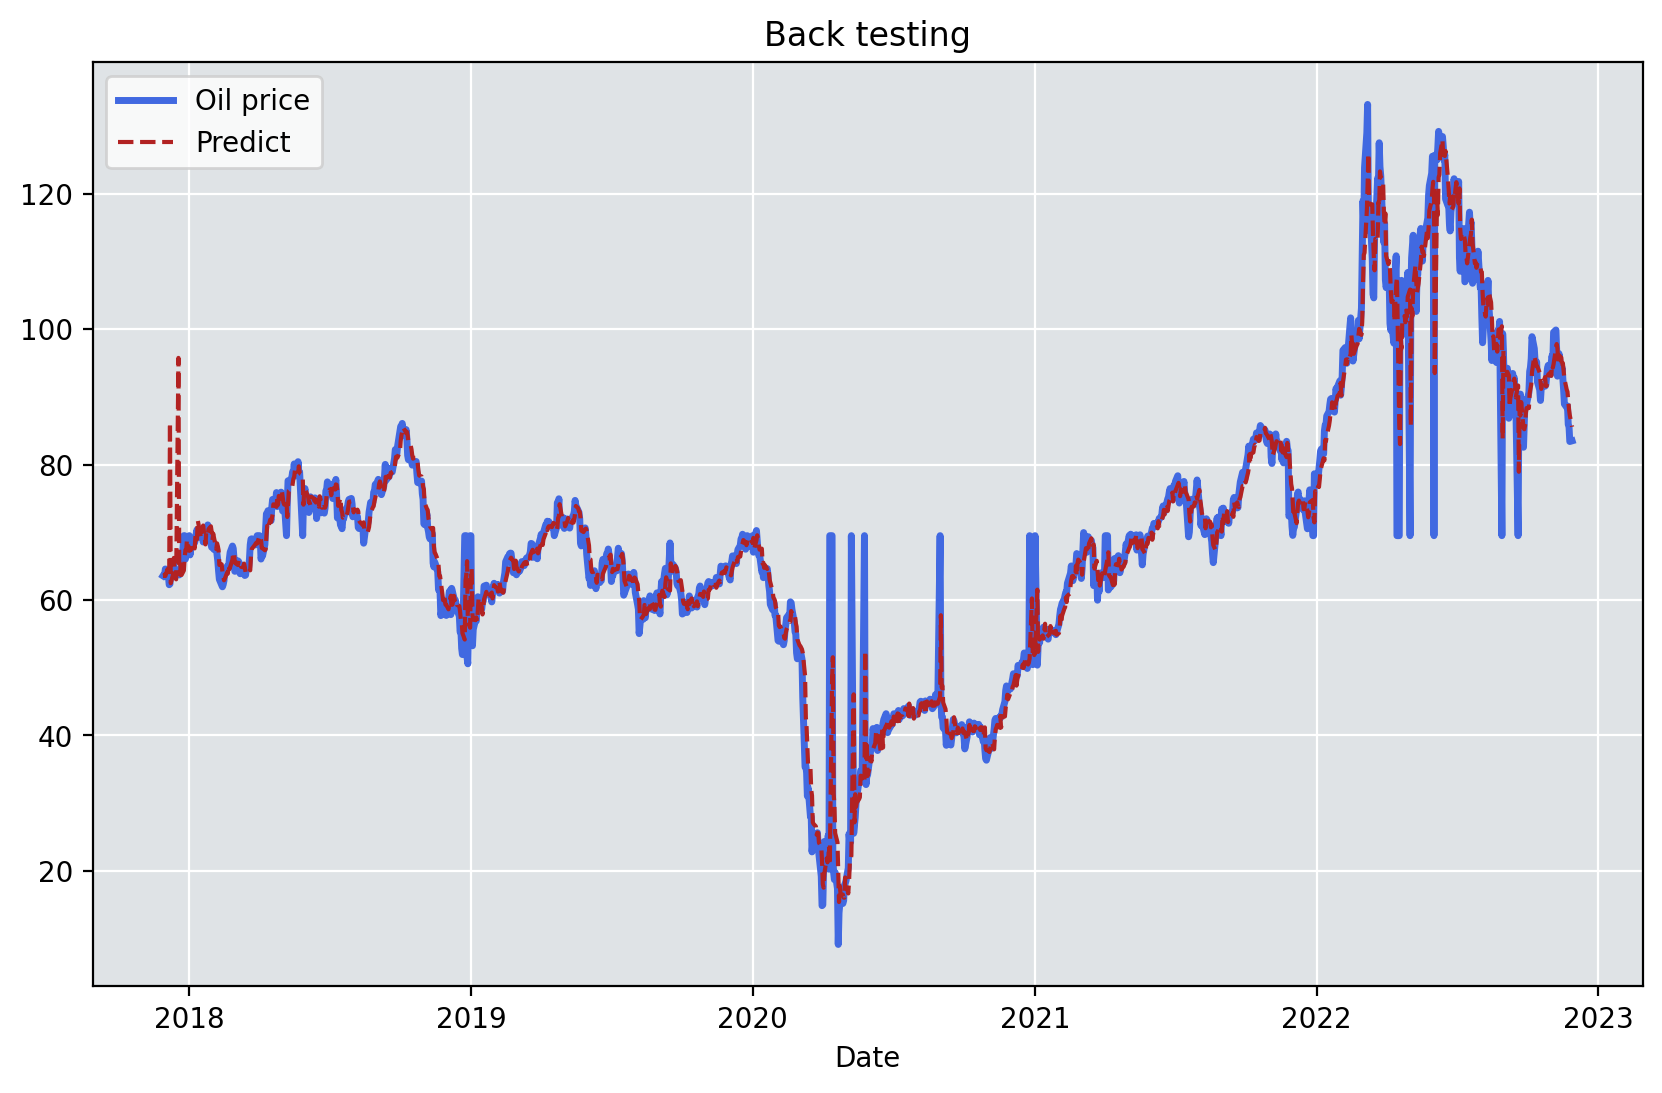

In [26]:
#Prediction
pred = model.predict()
df['predict'] = pred
df['predict'][0] = df['price'][0]
#Fix missing first prediction date due to first different

#Back testing
plt.figure(figsize = (10,6))
ax = plt.axes()
ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.plot(df['price'], c = 'royalblue', linewidth = 2.5, label = 'Oil price')
plt.plot(df['predict'], c = 'firebrick', linestyle = '--', label = 'Predict')
plt.xlabel('Date')
plt.legend()
plt.title('Back testing')

Text(0.5, 1.0, 'Forecast with confidence interval')

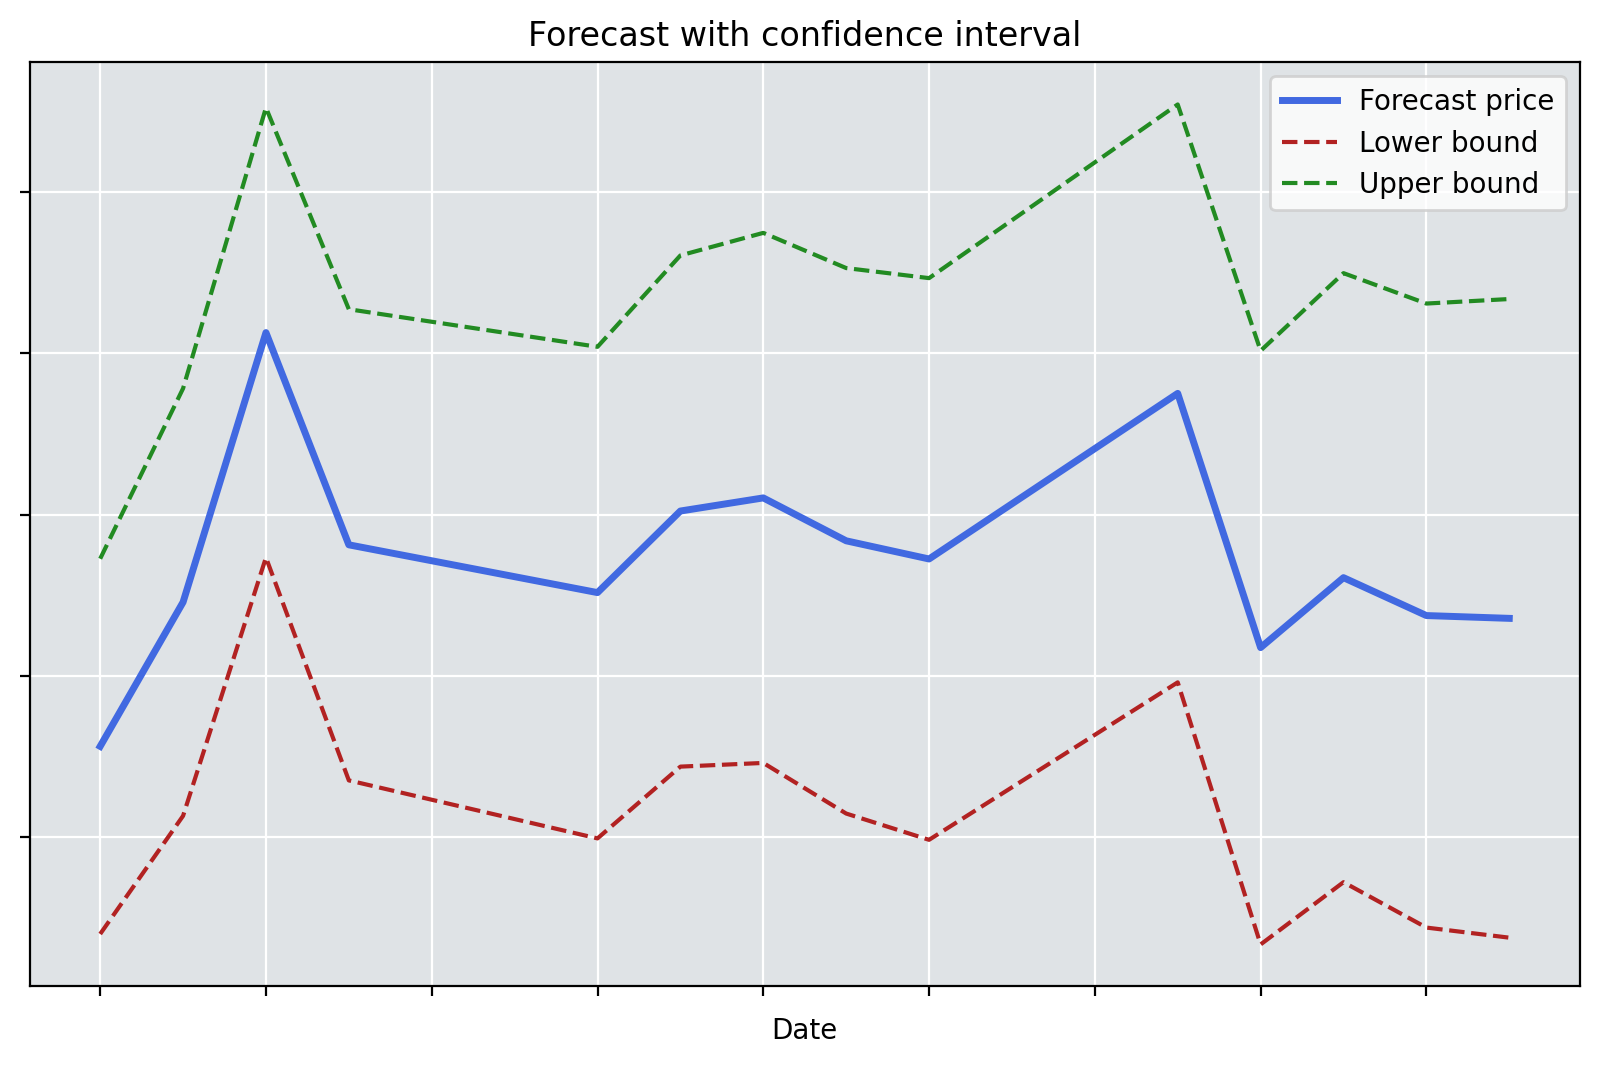

In [27]:
#Forecasting
forecast_ci = model.get_forecast(steps = 14) #2 Week ahead
forecast_ci = forecast_ci.conf_int(alpha = 0.90) #90% Confidence level
forecast_ci['price'] = model.forecast(steps = 14)

plt.figure(figsize = (10,6))
ax = plt.axes()
ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.plot(forecast_ci['price'], c = 'royalblue', linewidth = 2.5, label = 'Forecast price')
plt.plot(forecast_ci['lower price'], c = 'firebrick', linestyle = '--', label = 'Lower bound')
plt.plot(forecast_ci['upper price'], c = 'forestgreen', linestyle = '--', label = 'Upper bound')
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.xlabel('Date')
plt.legend()
plt.title('Forecast with confidence interval')

The oil price in the next 2 weeks is: 85.67851183615007


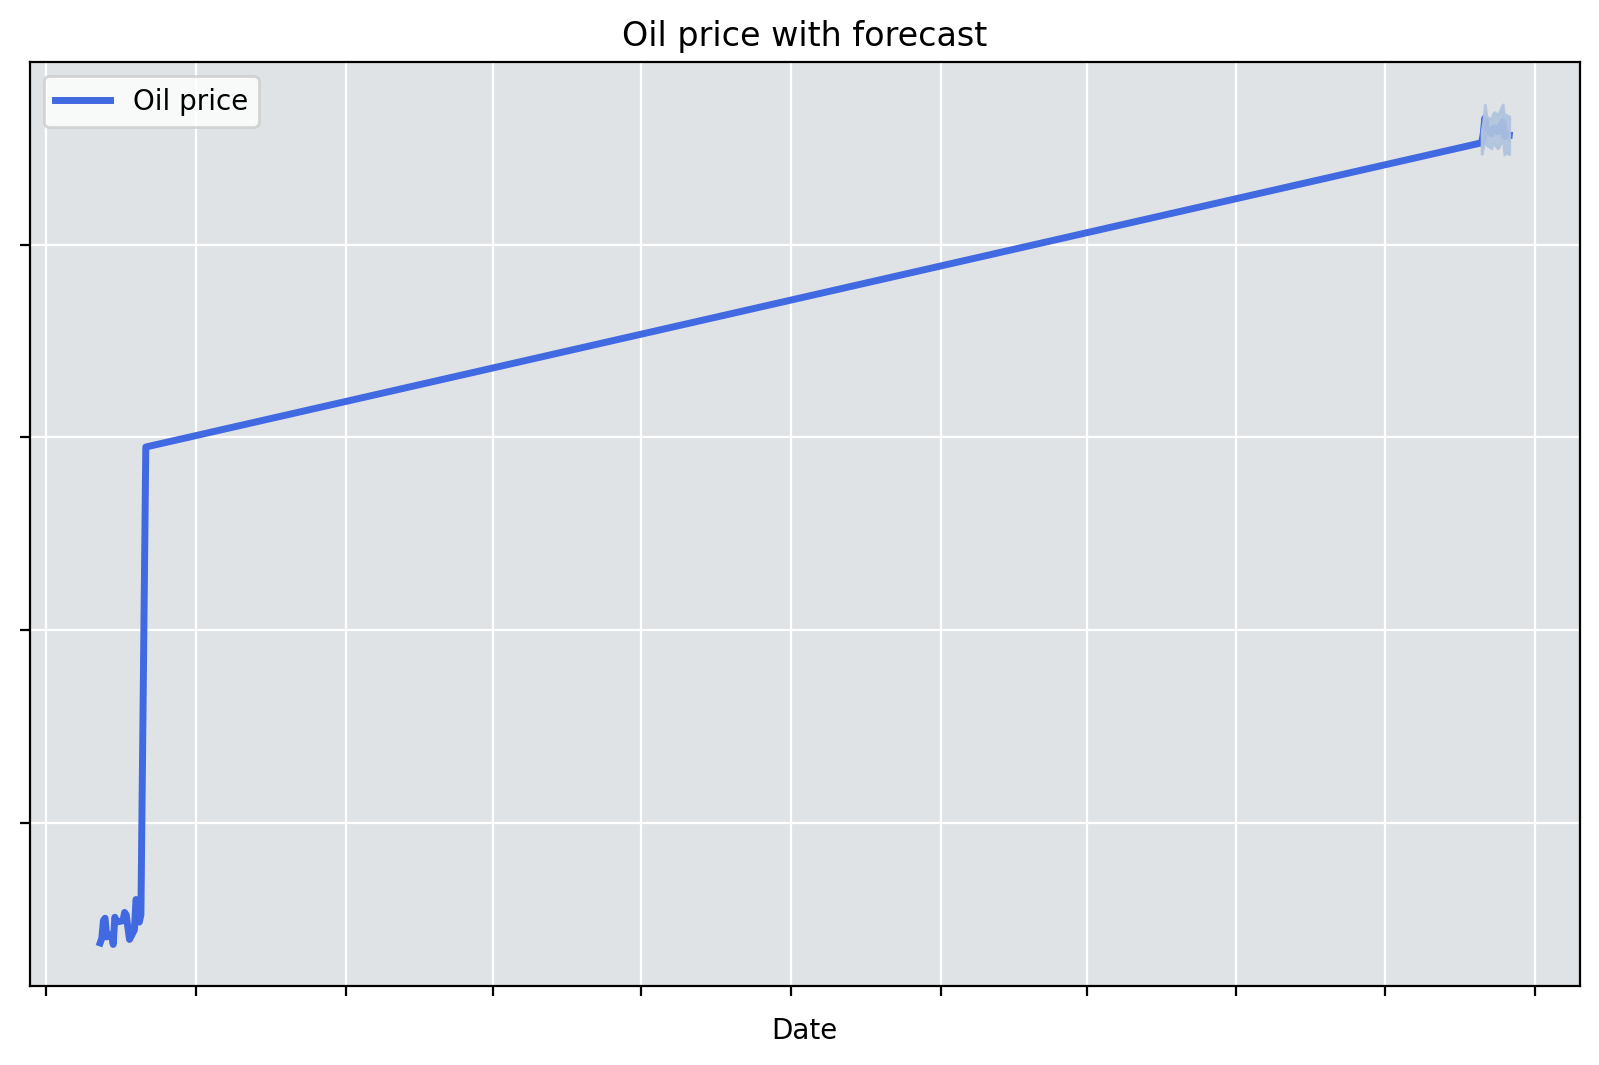

In [31]:
#Combine with actual data
df_forecast = pd.concat([df.loc['2020-08']['price'], model.forecast(steps = 14)], axis = 0)
#Use data since Aug-2020 onward

#Plot with confidence interval
plt.figure(figsize = (10,6))
ax = plt.axes()
ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.plot(df_forecast, c = 'royalblue', linewidth = 2.5, label = 'Oil price')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1],
                 color = 'lightsteelblue', alpha = 0.90, zorder = 2)
plt.xlabel('Date')
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.legend()
plt.title('Oil price with forecast')

#Get the lastest forecast price
print(f'The oil price in the next 2 weeks is: {df_forecast[-1]}')